# INCEPTION MODEL

**The nerual network this notebook implementing is called Inception-v3, it is a followup version of GoogleNet. As we know GoogleNet is designed to perform well even under limited memory and computational budget. **

+ VGGNet: 150+ million parameters
+ AlexNet: 60 million parameters
+ Inception: less than 25 million parameters
+ GoogleNet: 5 million parameters

**GoogleNet is sensitive to structural adjustment, simply doubling the filters's size would lead to a 4× increase in computational cost. So some guys in Google proposed some design principles to scale up GoogleNet and produce a followup model "inception-v3". It reported even better accuracy on the classification task on ILSVRC2012 than GoogleNet**

![alt text](http://www.gageet.com/wp-content/uploads/2014/09/googlenet.jpg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
import lasagne
from lasagne.layers import InputLayer
from lasagne.layers import Conv2DLayer
from lasagne.layers import Pool2DLayer
from lasagne.layers import DenseLayer
from lasagne.layers import GlobalPoolLayer
from lasagne.layers import ConcatLayer
from lasagne.layers.normalization import batch_norm
from lasagne.nonlinearities import softmax

ImportError: cannot import name batch_norm

In [3]:
def bn_conv(input_layer, **kwargs):
    l = Conv2DLayer(input_layer, **kwargs)
    l = batch_norm(l, epsilon=0.001)
    return l


In [4]:
def inceptionA(input_layer, nfilt):
    # Corresponds to a modified version of figure 5 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=1)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][1], filter_size=5, pad=2)

    l3 = bn_conv(input_layer, num_filters=nfilt[2][0], filter_size=1)
    l3 = bn_conv(l3, num_filters=nfilt[2][1], filter_size=3, pad=1)
    l3 = bn_conv(l3, num_filters=nfilt[2][2], filter_size=3, pad=1)

    l4 = Pool2DLayer(
        input_layer, pool_size=3, stride=1, pad=1, mode='average_exc_pad')
    l4 = bn_conv(l4, num_filters=nfilt[3][0], filter_size=1)

    return ConcatLayer([l1, l2, l3, l4])


In [5]:
def inceptionB(input_layer, nfilt):
    # Corresponds to a modified version of figure 10 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=3, stride=2)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][1], filter_size=3, pad=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][2], filter_size=3, stride=2)

    l3 = Pool2DLayer(input_layer, pool_size=3, stride=2)

    return ConcatLayer([l1, l2, l3])


In [6]:
def inceptionC(input_layer, nfilt):
    # Corresponds to figure 6 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=1)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][1], filter_size=(1, 7), pad=(0, 3))
    l2 = bn_conv(l2, num_filters=nfilt[1][2], filter_size=(7, 1), pad=(3, 0))

    l3 = bn_conv(input_layer, num_filters=nfilt[2][0], filter_size=1)
    l3 = bn_conv(l3, num_filters=nfilt[2][1], filter_size=(7, 1), pad=(3, 0))
    l3 = bn_conv(l3, num_filters=nfilt[2][2], filter_size=(1, 7), pad=(0, 3))
    l3 = bn_conv(l3, num_filters=nfilt[2][3], filter_size=(7, 1), pad=(3, 0))
    l3 = bn_conv(l3, num_filters=nfilt[2][4], filter_size=(1, 7), pad=(0, 3))

    l4 = Pool2DLayer(
        input_layer, pool_size=3, stride=1, pad=1, mode='average_exc_pad')
    l4 = bn_conv(l4, num_filters=nfilt[3][0], filter_size=1)

    return ConcatLayer([l1, l2, l3, l4])


In [7]:
def inceptionD(input_layer, nfilt):
    # Corresponds to a modified version of figure 10 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=1)
    l1 = bn_conv(l1, num_filters=nfilt[0][1], filter_size=3, stride=2)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2 = bn_conv(l2, num_filters=nfilt[1][1], filter_size=(1, 7), pad=(0, 3))
    l2 = bn_conv(l2, num_filters=nfilt[1][2], filter_size=(7, 1), pad=(3, 0))
    l2 = bn_conv(l2, num_filters=nfilt[1][3], filter_size=3, stride=2)

    l3 = Pool2DLayer(input_layer, pool_size=3, stride=2)

    return ConcatLayer([l1, l2, l3])

In [8]:
def inceptionE(input_layer, nfilt, pool_mode):
    # Corresponds to figure 7 in the paper
    l1 = bn_conv(input_layer, num_filters=nfilt[0][0], filter_size=1)

    l2 = bn_conv(input_layer, num_filters=nfilt[1][0], filter_size=1)
    l2a = bn_conv(l2, num_filters=nfilt[1][1], filter_size=(1, 3), pad=(0, 1))
    l2b = bn_conv(l2, num_filters=nfilt[1][2], filter_size=(3, 1), pad=(1, 0))

    l3 = bn_conv(input_layer, num_filters=nfilt[2][0], filter_size=1)
    l3 = bn_conv(l3, num_filters=nfilt[2][1], filter_size=3, pad=1)
    l3a = bn_conv(l3, num_filters=nfilt[2][2], filter_size=(1, 3), pad=(0, 1))
    l3b = bn_conv(l3, num_filters=nfilt[2][3], filter_size=(3, 1), pad=(1, 0))

    l4 = Pool2DLayer(
        input_layer, pool_size=3, stride=1, pad=1, mode=pool_mode)

    l4 = bn_conv(l4, num_filters=nfilt[3][0], filter_size=1)

    return ConcatLayer([l1, l2a, l2b, l3a, l3b, l4])


In [9]:

net = {}

net['input'] = InputLayer((None, 3, 299, 299))
net['conv'] = bn_conv(net['input'],
                      num_filters=32, filter_size=3, stride=2)
net['conv_1'] = bn_conv(net['conv'], num_filters=32, filter_size=3)
net['conv_2'] = bn_conv(net['conv_1'],
                        num_filters=64, filter_size=3, pad=1)
net['pool'] = Pool2DLayer(net['conv_2'], pool_size=3, stride=2, mode='max')

net['conv_3'] = bn_conv(net['pool'], num_filters=80, filter_size=1)

net['conv_4'] = bn_conv(net['conv_3'], num_filters=192, filter_size=3)

net['pool_1'] = Pool2DLayer(net['conv_4'],
                            pool_size=3, stride=2, mode='max')
net['mixed/join'] = inceptionA(
    net['pool_1'], nfilt=((64,), (48, 64), (64, 96, 96), (32,)))
net['mixed_1/join'] = inceptionA(
    net['mixed/join'], nfilt=((64,), (48, 64), (64, 96, 96), (64,)))

net['mixed_2/join'] = inceptionA(
    net['mixed_1/join'], nfilt=((64,), (48, 64), (64, 96, 96), (64,)))

net['mixed_3/join'] = inceptionB(
    net['mixed_2/join'], nfilt=((384,), (64, 96, 96)))

net['mixed_4/join'] = inceptionC(
    net['mixed_3/join'],
    nfilt=((192,), (128, 128, 192), (128, 128, 128, 128, 192), (192,)))

net['mixed_5/join'] = inceptionC(
    net['mixed_4/join'],
    nfilt=((192,), (160, 160, 192), (160, 160, 160, 160, 192), (192,)))

net['mixed_6/join'] = inceptionC(
    net['mixed_5/join'],
    nfilt=((192,), (160, 160, 192), (160, 160, 160, 160, 192), (192,)))

net['mixed_7/join'] = inceptionC(
    net['mixed_6/join'],
    nfilt=((192,), (192, 192, 192), (192, 192, 192, 192, 192), (192,)))

net['mixed_8/join'] = inceptionD(
    net['mixed_7/join'],
    nfilt=((192, 320), (192, 192, 192, 192)))

net['mixed_9/join'] = inceptionE(
    net['mixed_8/join'],
    nfilt=((320,), (384, 384, 384), (448, 384, 384, 384), (192,)),
    pool_mode='average_exc_pad')

net['mixed_10/join'] = inceptionE(
    net['mixed_9/join'],
    nfilt=((320,), (384, 384, 384), (448, 384, 384, 384), (192,)),
    pool_mode='max')

net['pool3'] = GlobalPoolLayer(net['mixed_10/join'])

net['softmax'] = DenseLayer(
    net['pool3'], num_units=1008, nonlinearity=softmax)

output_layer = net['softmax']


**_Before inserting images into the network, preprocessing the images first. The default size is 299×299, I tried to change the input image setup of the network but the result is not good. Because the parameters were trained with 299×299 images. So if we want to change the size of input images, maybe we need to train the whole network from scratch._** 

In [11]:
def preprocess(im):
    # Expected input: RGB uint8 image
    # Input to network should be bc01, 299x299 pixels, scaled to [-1, 1].
    import skimage.transform
    import numpy as np

    im = skimage.transform.resize(im, (299, 299), preserve_range=True)
    im = (im - 128) / 128.
    im = np.rollaxis(im, 2)[np.newaxis].astype('float32')

    return im

In [10]:
import pickle

model = pickle.load(open('inception_v3.pkl'))
CLASSES = model['synset words']

lasagne.layers.set_all_param_values(output_layer, model['param values'])

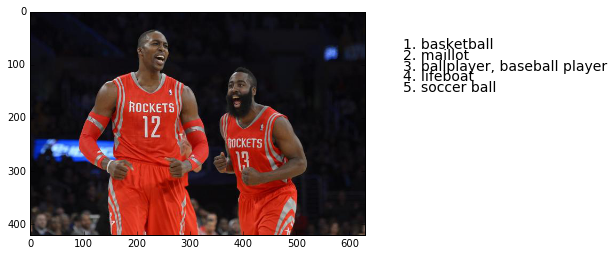

In [15]:
import matplotlib.image as mpimg
houston = mpimg.imread('houston.jpg')
plt.imshow(houston)
pre_houston = skimage.transform.resize(houston, (299, 299), preserve_range=True)
pre_houston_1 = (pre_houston - 128) / 128.
pre_houston_2 = np.rollaxis(pre_houston_1, 2)[np.newaxis].astype('float32')
prob_houston = np.array(lasagne.layers.get_output(net['softmax'], pre_houston_2, deterministic=True).eval())
label_houston = np.argsort(prob_houston[0])[-1:-6:-1]
for n1, label1 in enumerate(label_houston):
    plt.text(700, 70 + n1 * 20, '{}. {}'.format(n1+1, CLASSES[label1]), fontsize=14)

**_Load more example from ImageNet to check the network_**

In [12]:
import io
import skimage.transform

def prep_image(url):
    ext = url.split('.')[-1]
    im = plt.imread(io.BytesIO(urllib.urlopen(url).read()), ext)
    return skimage.transform.resize(im, (224, 224), preserve_range=True), preprocess(im)

In [17]:
import urllib

index = urllib.urlopen('http://www.image-net.org/challenges/LSVRC/2012/ori_urls/indexval.html').read()
image_urls = index.split('<br>')

np.random.seed(23)
np.random.shuffle(image_urls)
image_urls1 = image_urls[:5]
image_urls2 = image_urls[50:55]

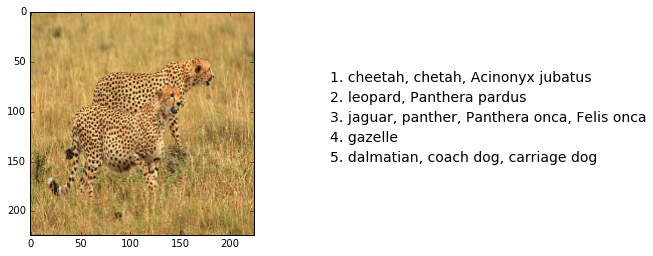

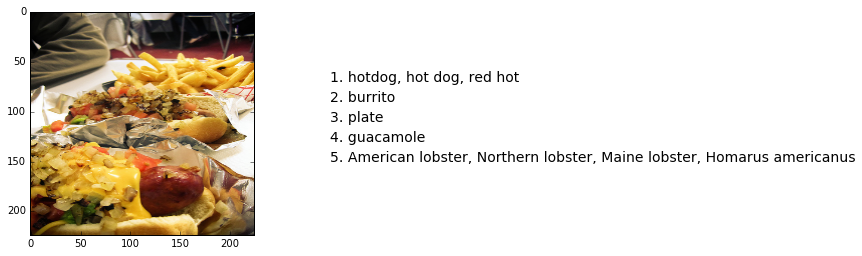

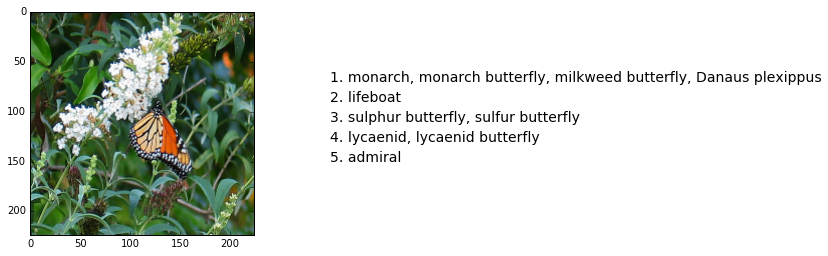

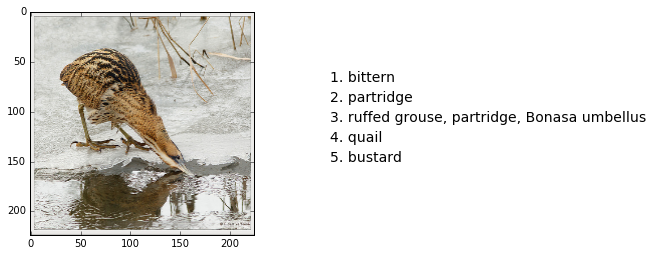

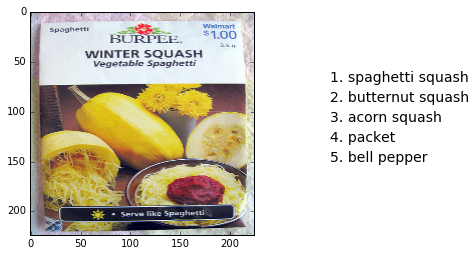

In [18]:
for url in image_urls2:
    try:
        rawim, im = prep_image(url)

        prob = np.array(lasagne.layers.get_output(net['softmax'], im, deterministic=True).eval())
        top5 = np.argsort(prob[0])[-1:-6:-1]

        plt.figure()
        plt.imshow(rawim.astype('uint8'))
        plt.axis('on')
        for n, label in enumerate(top5):
            plt.text(300, 70 + n * 20, '{}. {}'.format(n+1, CLASSES[label]), fontsize=14)
    except IOError:
        print('bad url: ' + url)

bad url: http://www.tmk.com/tiger/6F5S5684-l.jpg


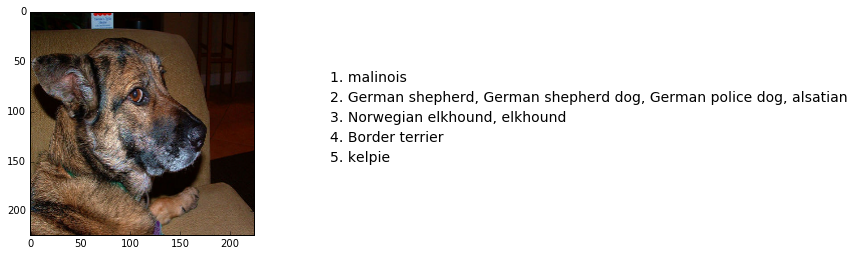

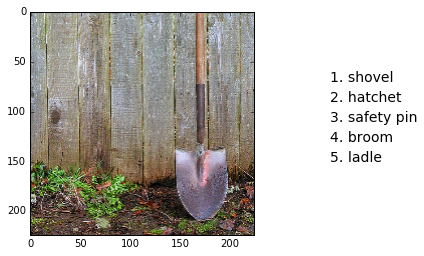

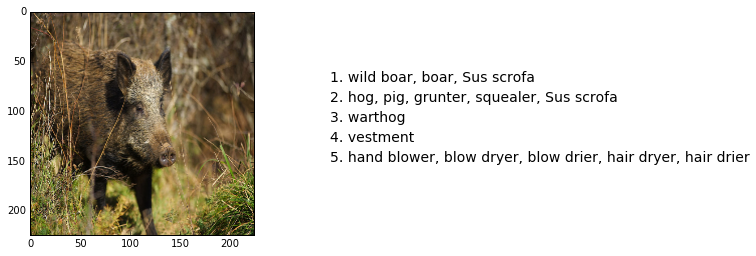

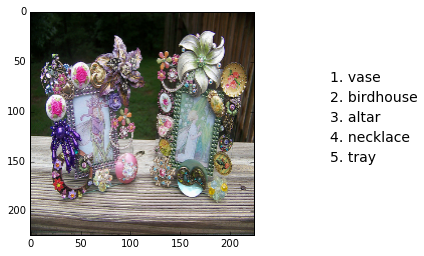

In [19]:
for url in image_urls1:
    try:
        rawim, im = prep_image(url)

        prob = np.array(lasagne.layers.get_output(net['softmax'], im, deterministic=True).eval())
        top5 = np.argsort(prob[0])[-1:-6:-1]

        plt.figure()
        plt.imshow(rawim.astype('uint8'))
        plt.axis('on')
        for n, label in enumerate(top5):
            plt.text(300, 70 + n * 20, '{}. {}'.format(n+1, CLASSES[label]), fontsize=14)
    except IOError:
        print('bad url: ' + url)

**_Figure out what each layer is doing_**

In [26]:
import pylab
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)
pylab.rcParams['figure.subplot.hspace']=0.05
pylab.rcParams['figure.subplot.wspace']=0.05

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [22]:
first_layer = lasagne.layers.get_output(net['conv'], pre_houston_2, deterministic=True).eval() # shape (1,32,149,149)

 **_FIRST CONVOLUTIONAL LAYER_** 
 + _Filter size: 3_
 + _Number of filters: 32_

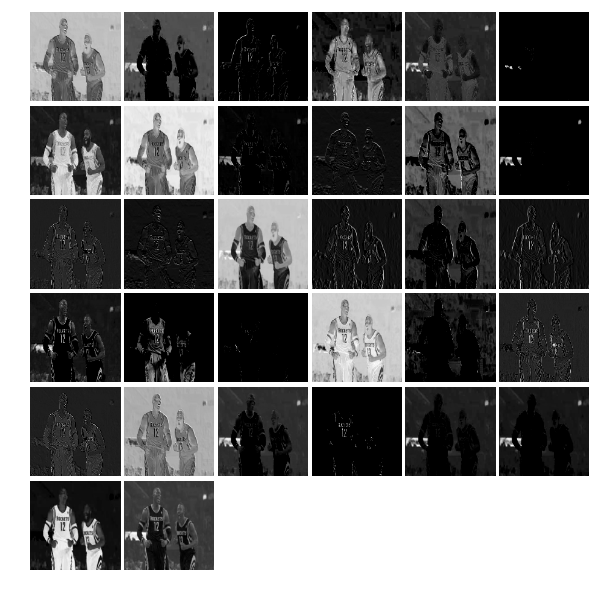

In [27]:
for i in range(0,first_layer.shape[1],1):
    pylab.subplot(np.ceil(np.sqrt(32/1.0)),np.ceil(np.sqrt(32/1.0)),i/1.0+1);
    plt.imshow(first_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

 **_SECOND CONVOLUTIONAL LAYER_** 
 + _Filter size: 3_
 + _Number of filters: 32_

In [29]:
second_layer = lasagne.layers.get_output(net['conv_1'], pre_houston_2, deterministic=True).eval() # shape (1,32,147,147)

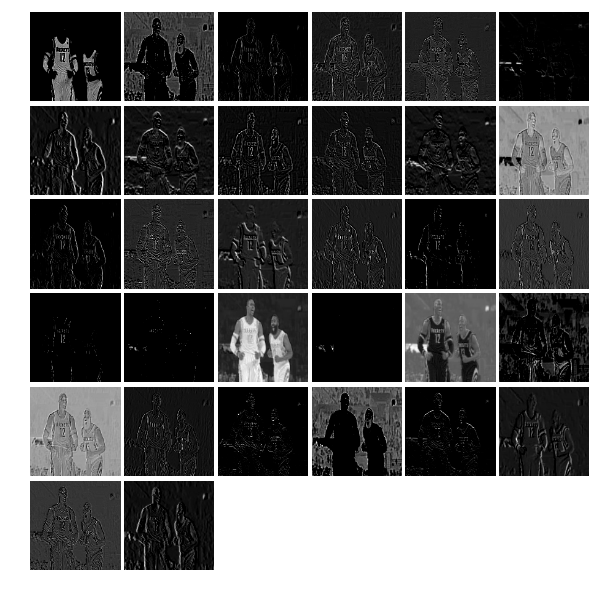

In [30]:
for i in range(0,second_layer.shape[1],1):
    pylab.subplot(np.ceil(np.sqrt(32/1.0)),np.ceil(np.sqrt(32/1.0)),i/1.0+1);
    plt.imshow(second_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

 **_THIRD CONVOLUTIONAL LAYER_** 
 + _Filter size: 3_
 + _Number of filters: 64_
 + _Pad size: 1_

In [32]:
third_layer = lasagne.layers.get_output(net['conv_2'], pre_houston_2, deterministic=True).eval() # shape (1,64,147,147)

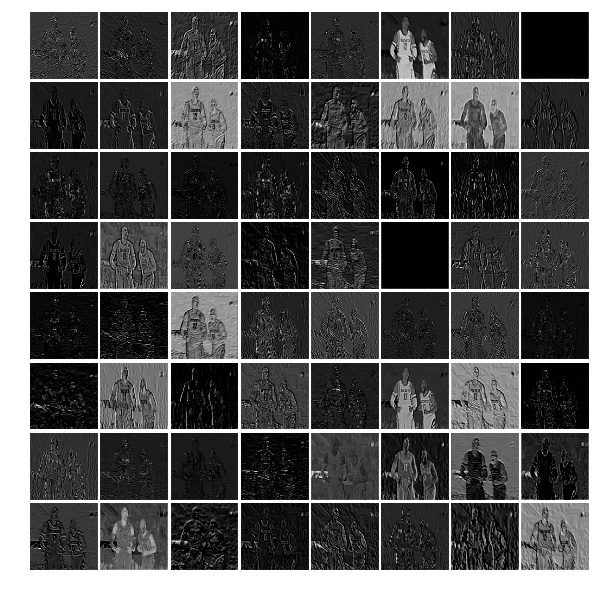

In [33]:
for i in range(0,third_layer.shape[1],1):
    pylab.subplot(np.ceil(np.sqrt(64.0)),np.ceil(np.sqrt(64/1.0)),i/1.0+1);
    plt.imshow(third_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

 **_FOURTH CONVOLUTIONAL LAYER_** 
 + _Filter size: 1_
 + _Number of filters: 80_

In [35]:
fourth_layer = lasagne.layers.get_output(net['conv_3'], pre_houston_2, deterministic=True).eval() # shape (1,80,73,73)

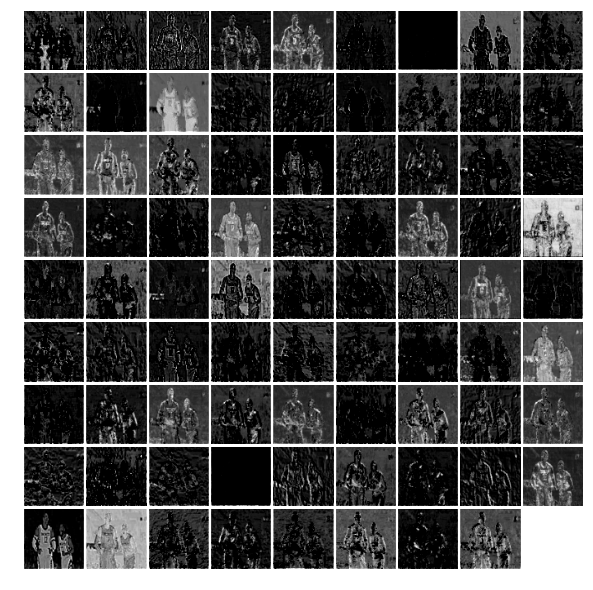

In [36]:
for i in range(0,fourth_layer.shape[1],1):
    pylab.subplot(np.ceil(np.sqrt(80.0)),np.ceil(np.sqrt(80/1.0)),i/1.0+1);
    plt.imshow(fourth_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

 **_FIFTH CONVOLUTIONAL LAYER_** 
 + _Filter size: 3_
 + _Number of filters: 192_

In [37]:
fifth_layer = lasagne.layers.get_output(net['conv_4'], pre_houston_2, deterministic=True).eval() # shape (1,192,71,71)

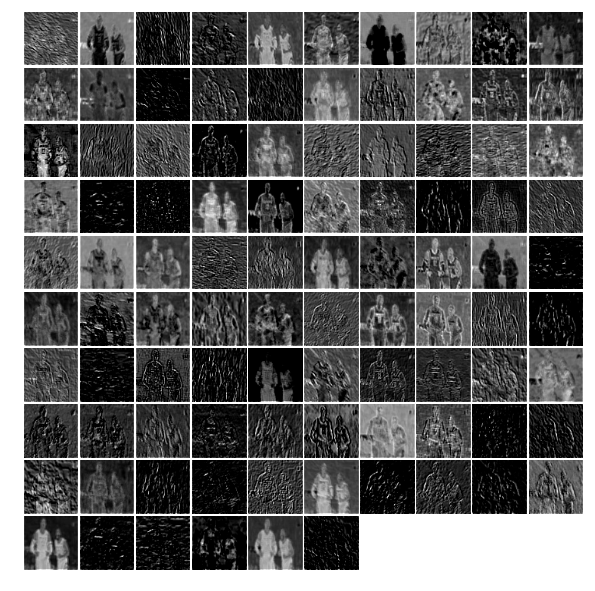

In [38]:
for i in range(0,fifth_layer.shape[1],2):
    pylab.subplot(np.ceil(np.sqrt(192.0/2)),np.ceil(np.sqrt(192/2.0)),i/2.0+1);
    plt.imshow(fifth_layer[0,i,:,:],cmap='gray')
    plt.axis('off')

 **_FIRST INCEPTION BLOCK_** 

In [40]:
first_mix = lasagne.layers.get_output(net['mixed/join'], pre_houston_2, deterministic=True).eval() # shape (1,256,35,35)

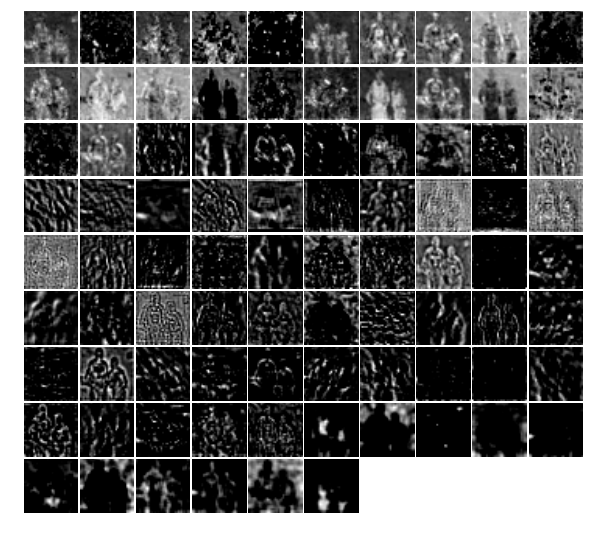

In [41]:
for i in range(0,first_mix.shape[1],3):
    pylab.subplot(np.ceil(np.sqrt(256/3)),np.ceil(np.sqrt(256/3.0)),i/3.0+1);
    plt.imshow(first_mix[0,i,:,:],cmap='gray')
    plt.axis('off')

 **_FIFTH INCEPTION BLOCK_** 

In [47]:
fifth_mix = lasagne.layers.get_output(net['mixed_4/join'], pre_houston_2, deterministic=True).eval() # shape (1,786,17,17)

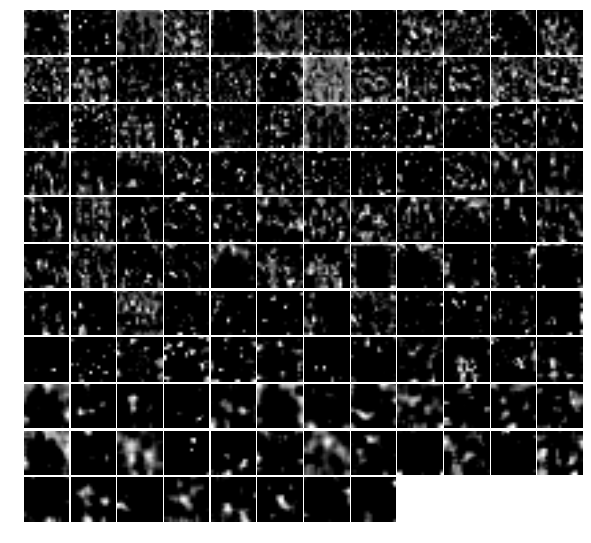

In [44]:
for i in range(0,fifth_mix.shape[1],6):
    pylab.subplot(np.ceil(np.sqrt(768/6.0)),np.ceil(np.sqrt(768/6.0)),i/6.0+1);
    plt.imshow(fifth_mix[0,i,:,:],cmap='gray')
    plt.axis('off')